<a href="https://colab.research.google.com/github/KashishTiwari-17/DiabetesPrediction/blob/main/ml_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
# Display basic information
print(data.head())
print(data.info())
print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
# Check for missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Check class distribution in the target variable
data['Outcome'].value_counts(normalize=True) * 100

,proportion
Outcome,
0,65.104167
1,34.895833


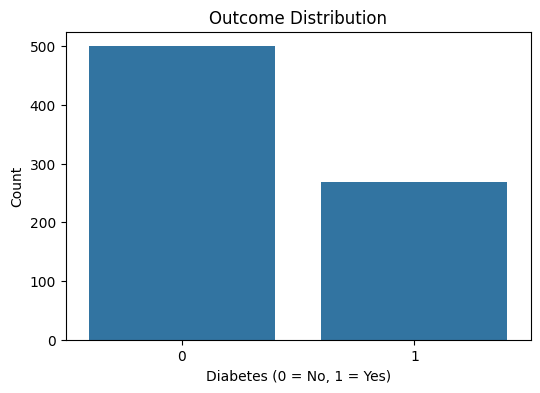

In [ ]:
# This shows how many people in the dataset have diabetes (1) vs don't (0)
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data)
plt.title("Outcome Distribution")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [ ]:
data.corr()['Outcome'].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


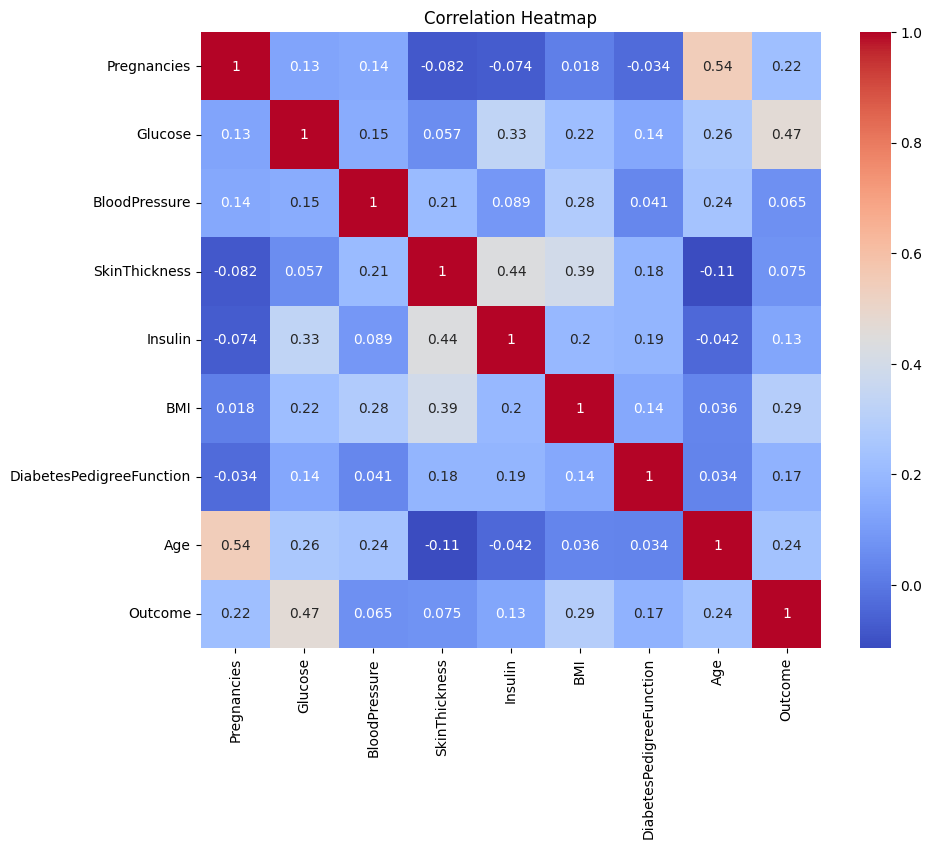

In [ ]:
#Correlation Heatmap
# This helps visualize relationships between features and how they correlate with the target
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Split data into features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [ ]:
# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
X, y = SMOTE(random_state=42).fit_resample(X, y)

In [ ]:
# Standardize features to have mean=0 and variance=1
#Insulin, BMI, and Glucose on very different scales, so scaling is important.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#defining ml models
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}


In [ ]:
# Dictionary to store confusion matrices
conf_matrices = {}


In [ ]:
#Train & Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    cm = confusion_matrix(y_test, y_pred)  # Get confusion matrix
    conf_matrices[name] = cm  # Save for visualization

    # Print evaluation metrics
    print(f"\n{name} Metrics:")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", cm)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:00:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Metrics:
Accuracy:  0.8300
Precision: 0.7863
Recall:    0.9109
F1 Score:  0.8440
Confusion Matrix:
 [[74 25]
 [ 9 92]]

Logistic Regression Metrics:
Accuracy:  0.7550
Precision: 0.7500
Recall:    0.7723
F1 Score:  0.7610
Confusion Matrix:
 [[73 26]
 [23 78]]

Random Forest Metrics:
Accuracy:  0.8200
Precision: 0.7876
Recall:    0.8812
F1 Score:  0.8318
Confusion Matrix:
 [[75 24]
 [12 89]]

SVM Metrics:
Accuracy:  0.7550
Precision: 0.7321
Recall:    0.8119
F1 Score:  0.7700
Confusion Matrix:
 [[69 30]
 [19 82]]


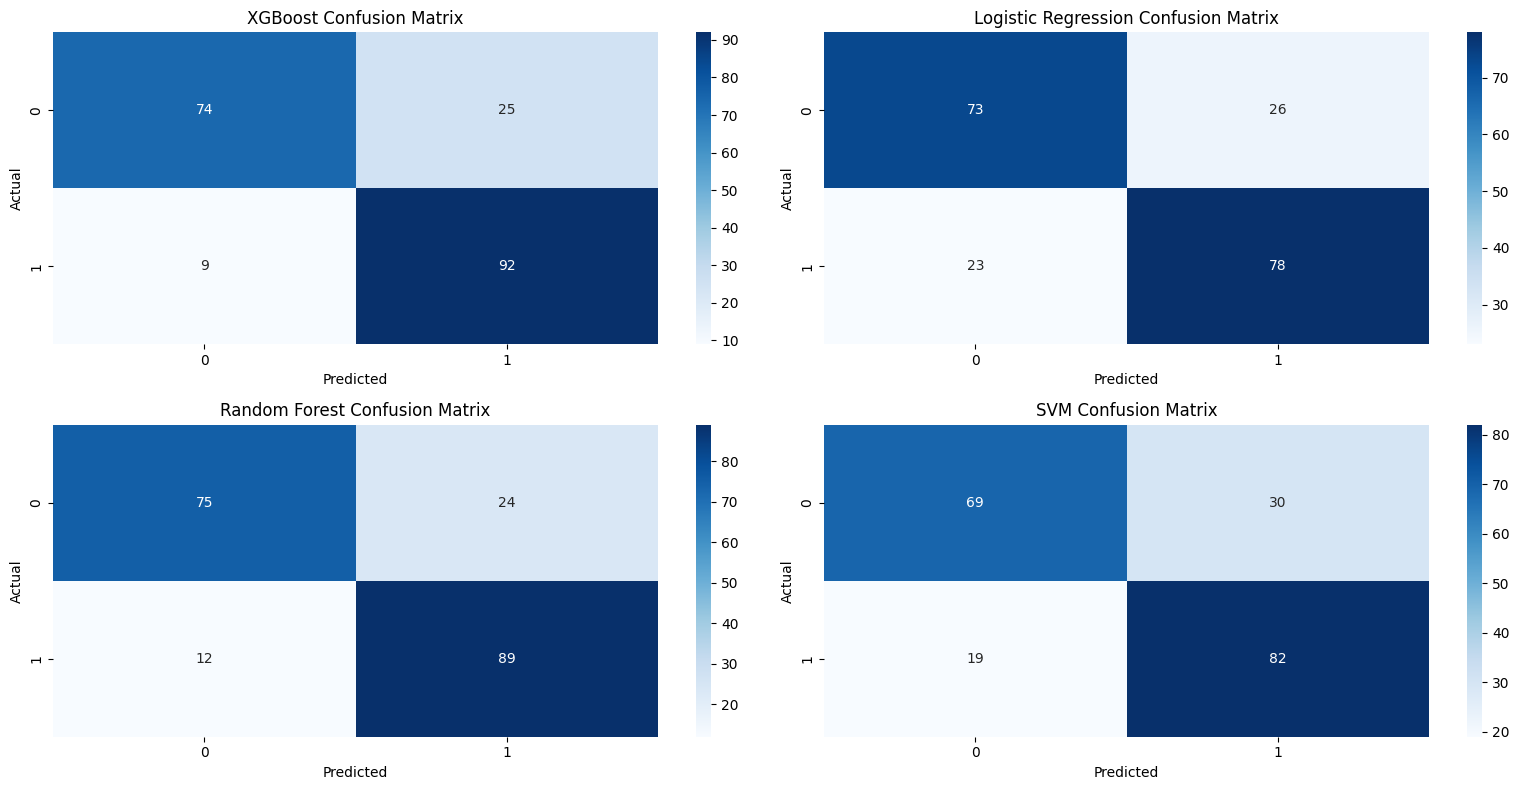

In [ ]:
#Visualize Confusion Matrices
plt.figure(figsize=(16, 8))
for i, (name, cm) in enumerate(conf_matrices.items()):
    plt.subplot(2, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()